### Recently I published a self help book titled Inspiration: Thoughts on Spirituality, Technology, Wealth, Leadership and Motivation. The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA

I have been working in automobile industry for last 12 years.So any data on automotive industry is interesting for me.Automotive industry has been going through disruptions like electric cars,car sharing and autonomous vehicles.In this project I will be exploring the data set and predicting the price of the car.This project is work in process and I will be updating the project in coming days.Please go through below blog link to read my views on future of Automotive industry. Electric cars http://btplife.blogspot.com/2017/05/electric-car-disruption.html

In this Notebook we will be covering following topics

1.Data Preprocessing

2.Handling Missing Values

3.Exploratory Data Analysis

4.Building Machine Learning Model

5.Model Evaluation

6.Conclusion 

To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile_data.csv


# 1.Data Preprocessing

### Importing Python Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#plt.style.use('seaborn')
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [3]:
car=pd.read_csv('../input/automobile-dataset/Automobile_data.csv')
car.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


### Summary of Dataset

In [4]:
print('Rows     :',car.shape[0])
print('Columns  :',car.shape[1])
print('\nFeatures :\n     :',car.columns.tolist())
print('\nMissing values    :',car.isnull().values.sum())
print('\nUnique values :  \n',car.nunique())

Rows     : 205
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values    : 0

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60


### Missing Values

In [5]:
total = car.isnull().sum().sort_values(ascending=False)
percent = ((car.isnull().sum())*100)/car.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)


,Total,Percent
symboling,0,0.0
normalized-losses,0,0.0
make,0,0.0
fuel-type,0,0.0
aspiration,0,0.0
num-of-doors,0,0.0
body-style,0,0.0
drive-wheels,0,0.0
engine-location,0,0.0
wheel-base,0,0.0


We see from above data that there are no missing values in the dataset

### Data info 

In [6]:
#car.info

Using the info command we can see that in many place data is represent by symbol ?.We have to replace ? with the mean value of the columns.We have to first prepare the data by doing cleaning on the data set.

# 2.Handling Missing Values

### Replacing ? Symbol with Mean of the Column

In [7]:
a=car[car['normalized-losses']!='?']
b=(a['normalized-losses'].astype(int)).mean()
car['normalized-losses']=car['normalized-losses'].replace('?',b).astype(int)

We can see than in some places the value for num-of-doors data is marked as ?.We fill this with appropriate value of num of doors.

### Cleaning num-of-doors

In [8]:
a=car[car['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In case of sedan cars the value of num-of-doors is missing in two places.We can see in most sedan cars the number of doors is 4.We can replace the missing values of num-of-doors with value 4

In [9]:
a=car['num-of-doors'].map({'two':2,'four':4,'?':4})
car['num-of-doors']=a

### Cleaning Price,Horse Power,Bore,Stroke and Peak RPM

In [10]:
a=car[car['price']!='?']
b=(a['price'].astype(int)).mean()
car['price']=car['price'].replace('?',b).astype(int)

a=car[car['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
car['horsepower']=car['horsepower'].replace('?',b).astype(int)

a=car[car['bore']!='?']
b=(a['bore'].astype(float)).mean()
car['bore']=car['bore'].replace('?',b).astype(float)

a=car[car['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
car['stroke']=car['stroke'].replace('?',b).astype(float)

a=car[car['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
car['peak-rpm']=car['peak-rpm'].replace('?',b).astype(float)

Missing all the ? symbol with the mean value of the columns 

### Cleaning the Number of Cylinders

In [11]:
a=car['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})
car['num-of-doors']=a

In case of number of cylinders we have replaced the text values with numerical values.

### Getting the basic stats of the data

In [12]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
num-of-doors,194.0,4.304124,0.679289,4.00,4.00,4.00,4.00,6.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94


### Some important observations from the dataset is 

Mean Horse Power 104

Highway mileage is 30.75

Price is 13207.12 Dollars

# 3.Exploratory Data Analysis

## Make 

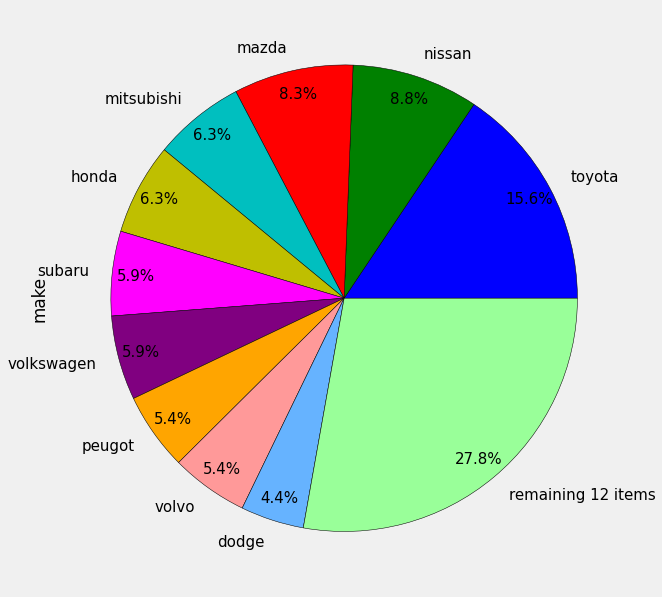

In [13]:
colors = ['b','g','r','c','y','magenta','purple','orange','#ff9999','#66b3ff','#99ff99']
temp = car['make'].value_counts()
temp2 = temp.head(10)
if len(temp) > 10:
   temp2['remaining {0} items'.format(len(temp)-10)] = sum(temp[10:])
temp2.plot(kind='pie',autopct="%1.1f%%",shadow=False,fontsize=15,pctdistance=0.9,colors=colors,wedgeprops={"edgecolor":"0","linewidth":0.5,"linestyle":"solid","antialiased":True},figsize=(15,10)) 

pass

We have more Japanese Cars in the Dataset followed by European.Toyota,Nissan,Mazda and Honda are all Japanese car makers.This is because after the oil crisis in late 1970s US customers prefered smaller and more fuel efficient cars made by the japanese car makers.

## Fuel Type 

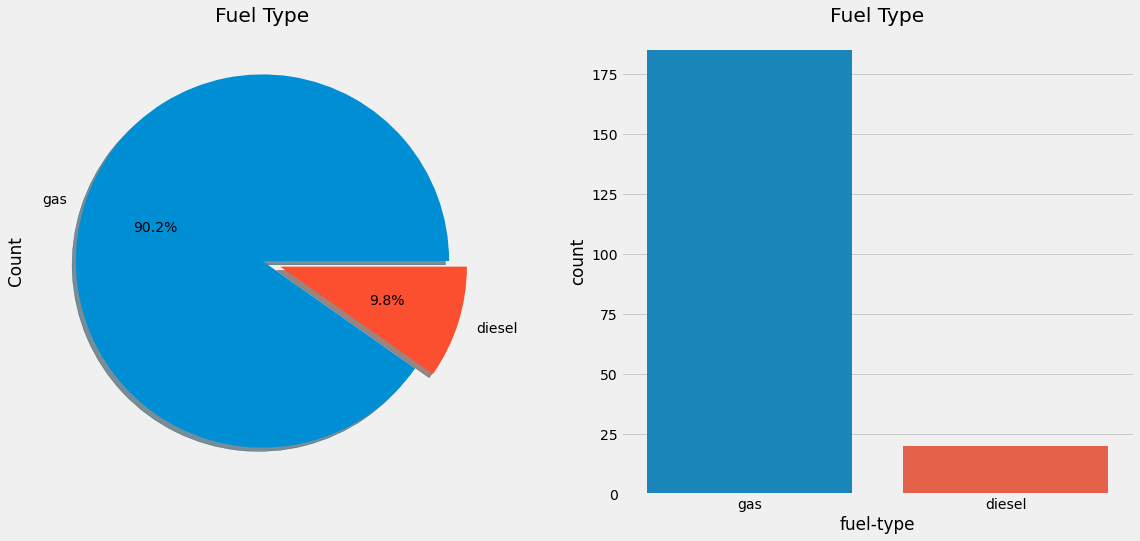

In [14]:
pd.crosstab(car.make,car['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')

f,ax=plt.subplots(1,2,figsize=(18,8))
car['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=car,ax=ax[1],order=car['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

## Fuel Type

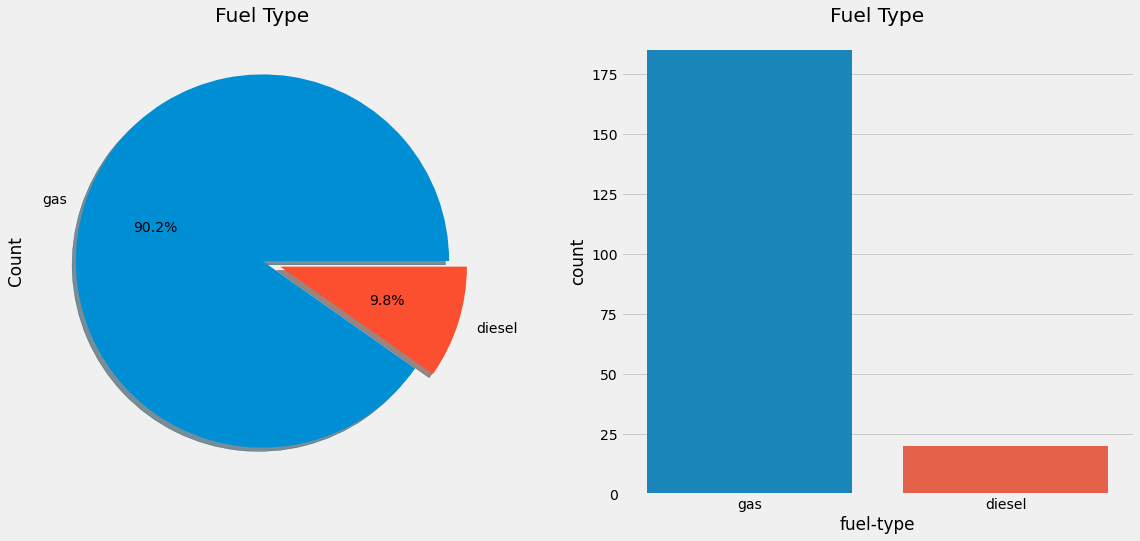

In [15]:
pd.crosstab(car.make,car['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')
f,ax=plt.subplots(1,2,figsize=(18,8))
car['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=car,ax=ax[1],order=car['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()


We can see that 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars.

### Cars of different make in the data set

In [16]:
print('Car makers in the data set are',car['make'].unique())

Car makers in the data set are ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


List contains American,Japanese and European car brands.

### Understanding the range of important features

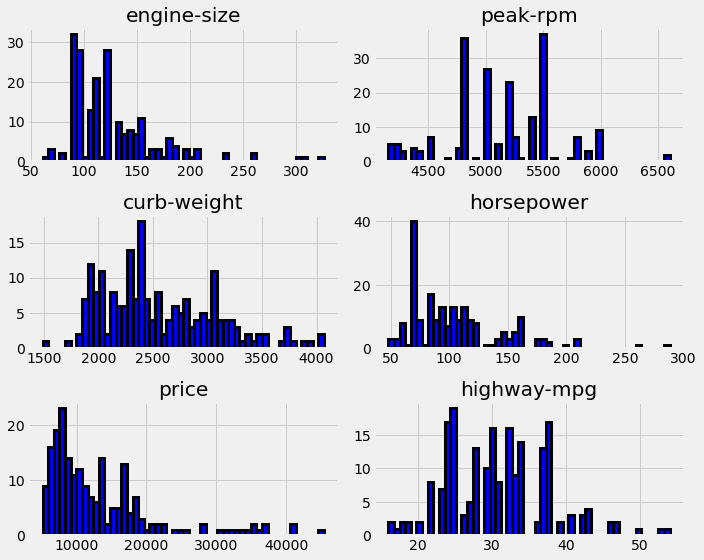

In [17]:
car[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=50,color='b',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

**1.Curb weight:** Is the total weight of the vehicle without the weight of the passenger.It includes weight of coolants,oil and fuel.Defination of curb weight may vary based on the standard adopted by a country.In this data set the curb weight of most cars is in the range 2000-3100 lbs.

**2.Engine Size:** It is the amount of air that can be sucked in by the engine.Generally it is measured in litres.For example an average car in India would have an engine capacity in the rane of 1-1.5 liter.

**3.Highway-mpg:** It is the kilometer or miles that a car can travel with one liter of fuel on the highway.In this data set it seems to me that it is the amount of miles the car travels with one gallon of fuel.

**4.Horse Power:** It is the measure of the power of the engine.One horse power is equivalent of the power of one horse.So 100 hp engine woulf be equivalent to the power of 100 horses.Now a days engine power is measure in Kilowatt which is the unit of power in SI System.

**5.Peak rpm:** RPM (Reolutions per minute) is the measure of the speed of roation of Engine per minute.The peak rpm of the vehicles are generally in the range 5000-6500 rpm.

**6.Price:** In US today the median price of the vehicle is around 35000$.This is a old data so it shows very low median car price.

### Which Make of Car is More?

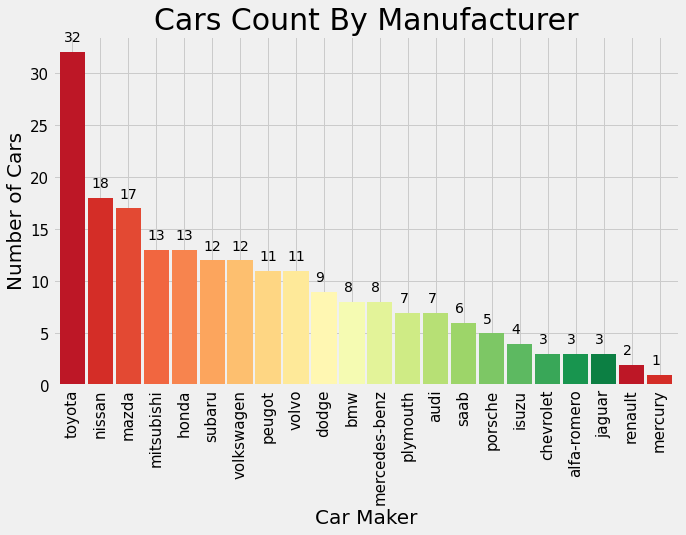

In [18]:
plt.subplots(figsize=(10,6))
ax=car['make'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

It seems more Japanese cars are sold in the US.As expected Toyota sold more cars in US.In the 70's due to oil price rise Americans switched to small cars.Japanese car makers were good at making high quality small cars.This is the reason we have more cars been sold from Toyota,Mazda and Nissan.

### Cars by Body Type

In [19]:
print('Different types of cars',car['body-style'].unique())

Different types of cars ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


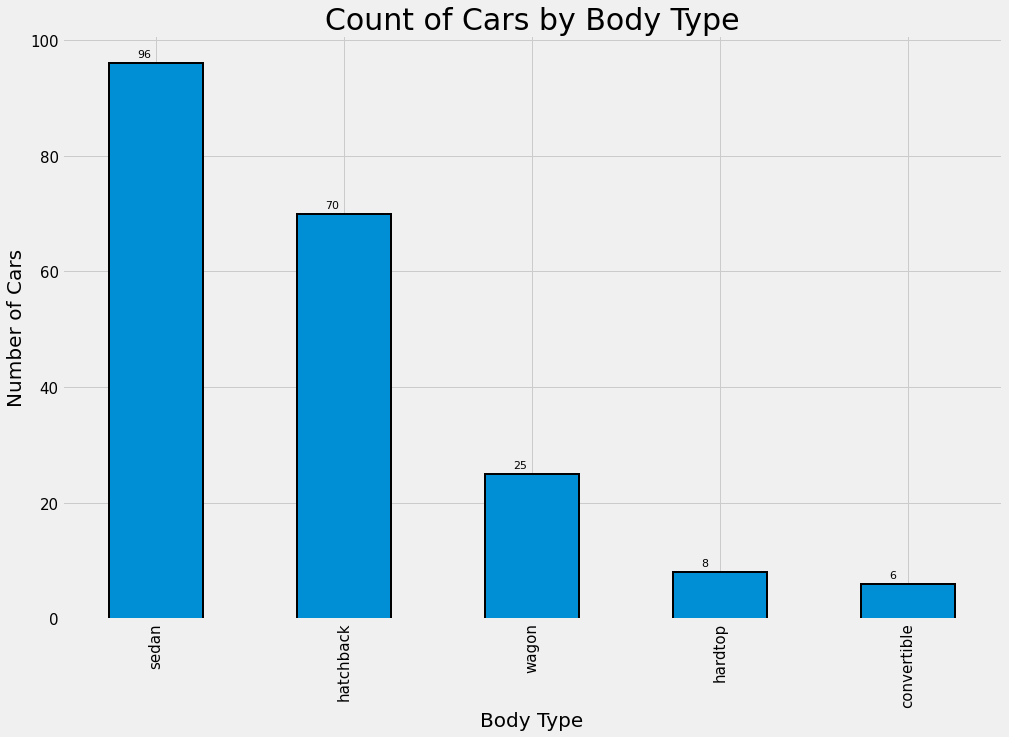

In [20]:

fig = plt.figure(figsize=(15, 10))
cars_type=car.groupby(['body-style']).count()['make']
ax=cars_type.sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),fontsize=11)
plt.xticks(rotation='vertical')
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Count of Cars by Body Type',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()

### Car Body Type Based on Manufacturer

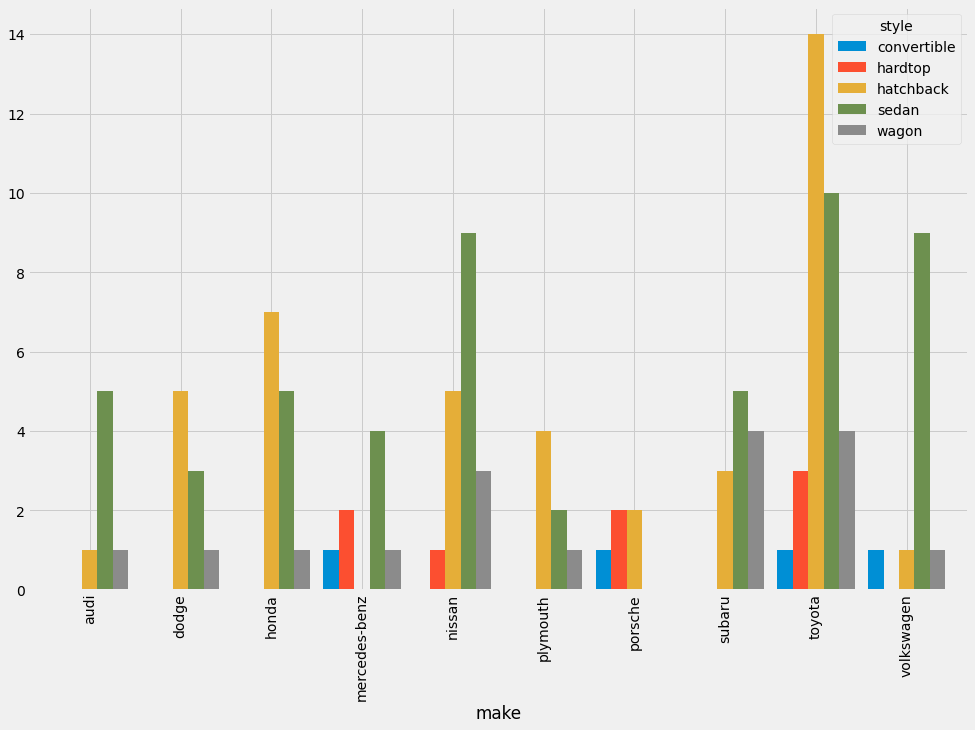

In [21]:
from matplotlib.pyplot import plot
plt.rcParams['figure.figsize']=(15,10)
#fig = plt.figure(figsize=(25, 25))
a=car.groupby(['body-style','make']).count().reset_index();
a=a[['make','body-style','symboling']]
a.columns=['make','style','count']
a=a.pivot('make','style','count')
a.dropna(thresh=3).plot.bar(width=0.85);
#plot.bar()
plt.ioff()
plt.show()

### Getting details of Engine type,Number of doors,type of fuel and body style

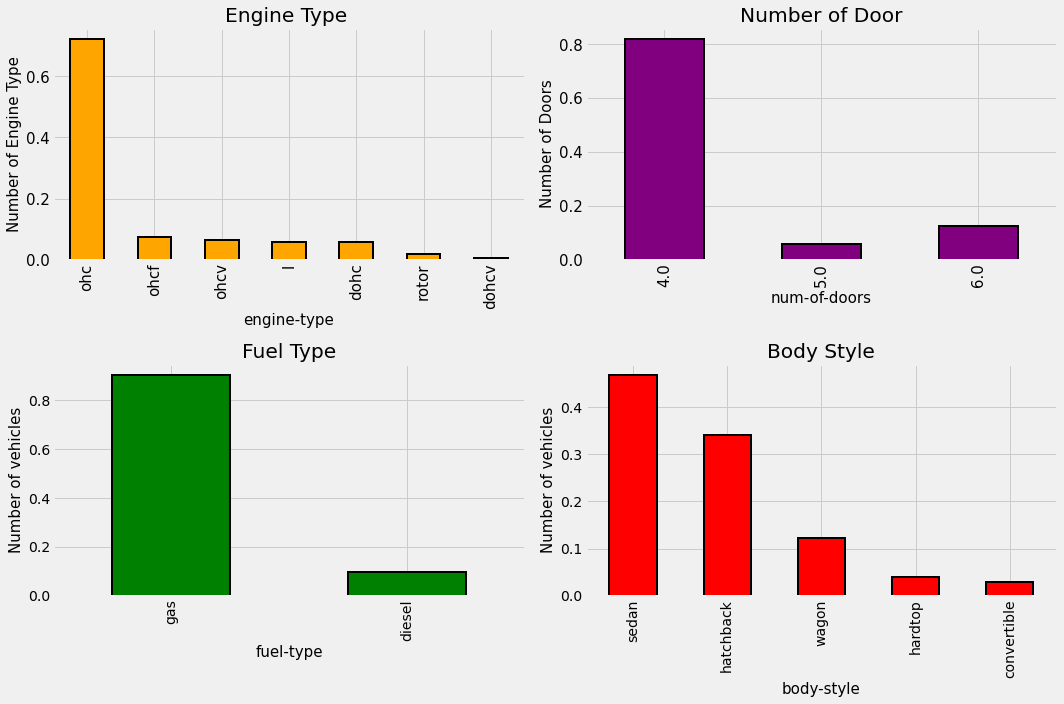

In [22]:
plt.figure(1)
plt.subplot(221)
ax1=car['engine-type'].value_counts(normalize=True).plot(figsize=(15,10),kind='bar',color='orange',edgecolor='k',linewidth=2)
plt.title("Engine Type ")
plt.ylabel('Number of Engine Type',fontsize=15)
ax1.tick_params(labelsize=15)
plt.xlabel('engine-type',fontsize=15);


plt.subplot(222)
ax2=car['num-of-doors'].value_counts(normalize=True).plot(figsize=(15,10),kind='bar',color='purple',edgecolor='k',linewidth=2)
plt.title("Number of Door")
plt.ylabel('Number of Doors',fontsize=15)
ax2.tick_params(labelsize=15)
plt.xlabel('num-of-doors',fontsize=15);

plt.subplot(223)
ax3=car['fuel-type'].value_counts(normalize= True).plot(figsize=(15,10),kind='bar',color='green',edgecolor='k',linewidth=2)
plt.title("Fuel Type")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('fuel-type',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplot(224)
ax4=car['body-style'].value_counts(normalize=True).plot(figsize=(15,10),kind='bar',color='red',edgecolor='k',linewidth=2)
plt.title("Body Style")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('body-style',fontsize=15);
plt.tight_layout()
plt.show()

1.DHC (Direct overhead cam) tyoe of engines are more in the data.

2.Most cars sold have 4 doors

3.Petrol(Gas) cars are more popular in America

4.Sedan Cars are most popular in America

### Fuel Economy by Car Makers

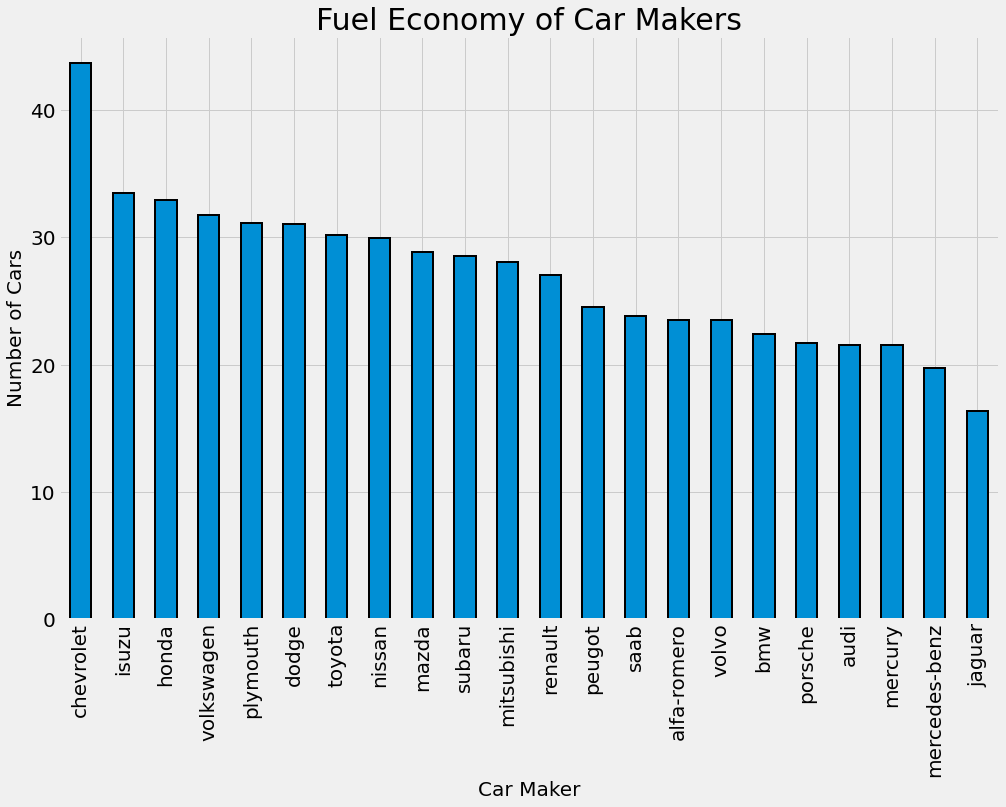

In [23]:
fig = plt.figure(figsize=(15, 10))
mileage=car.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Fuel Economy of Car Makers',fontsize=30)
ax.tick_params(labelsize=20)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

Chevy which is a brand of General motors had the highest milage followed by the Japanese car makers.European car makers except Volkswagen sell Luxary cars.So the Mileage of European car makers are lower.Cars with lower engine capacity generally have higher fuel economy.

### Relation between Horse Power and Number of Cylinders

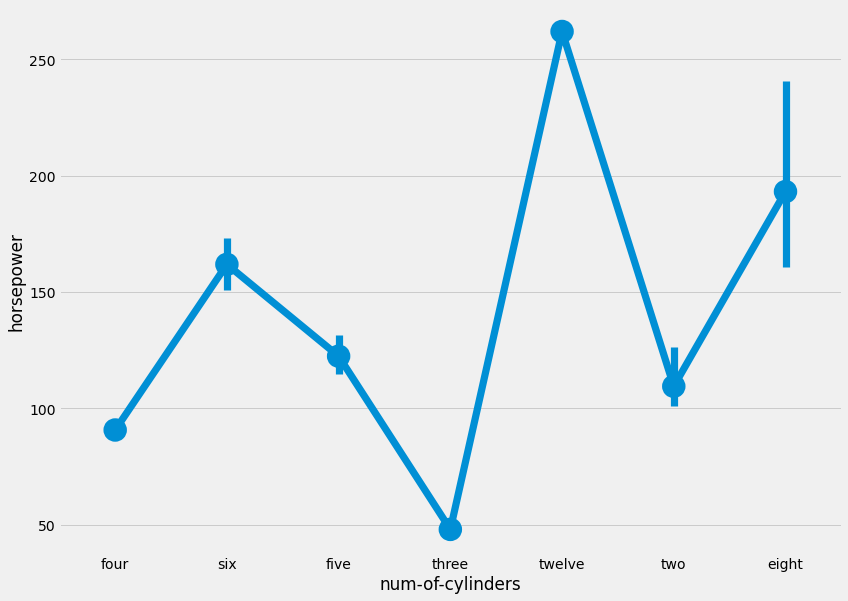

In [24]:
#plt.figure(figsize=(15, 12))
#sns.set(rc={'figure.figsize':(15,10)})
sns.factorplot(data=car, x="num-of-cylinders", y="horsepower",height=8.27, aspect=11.7/8.27)
plt.show()


We can see that the range of power output from twelve cylinder engine is very high.It seems more the engines with higher number of cylinders can give a bigger range of power output

### Car Price Based on Make

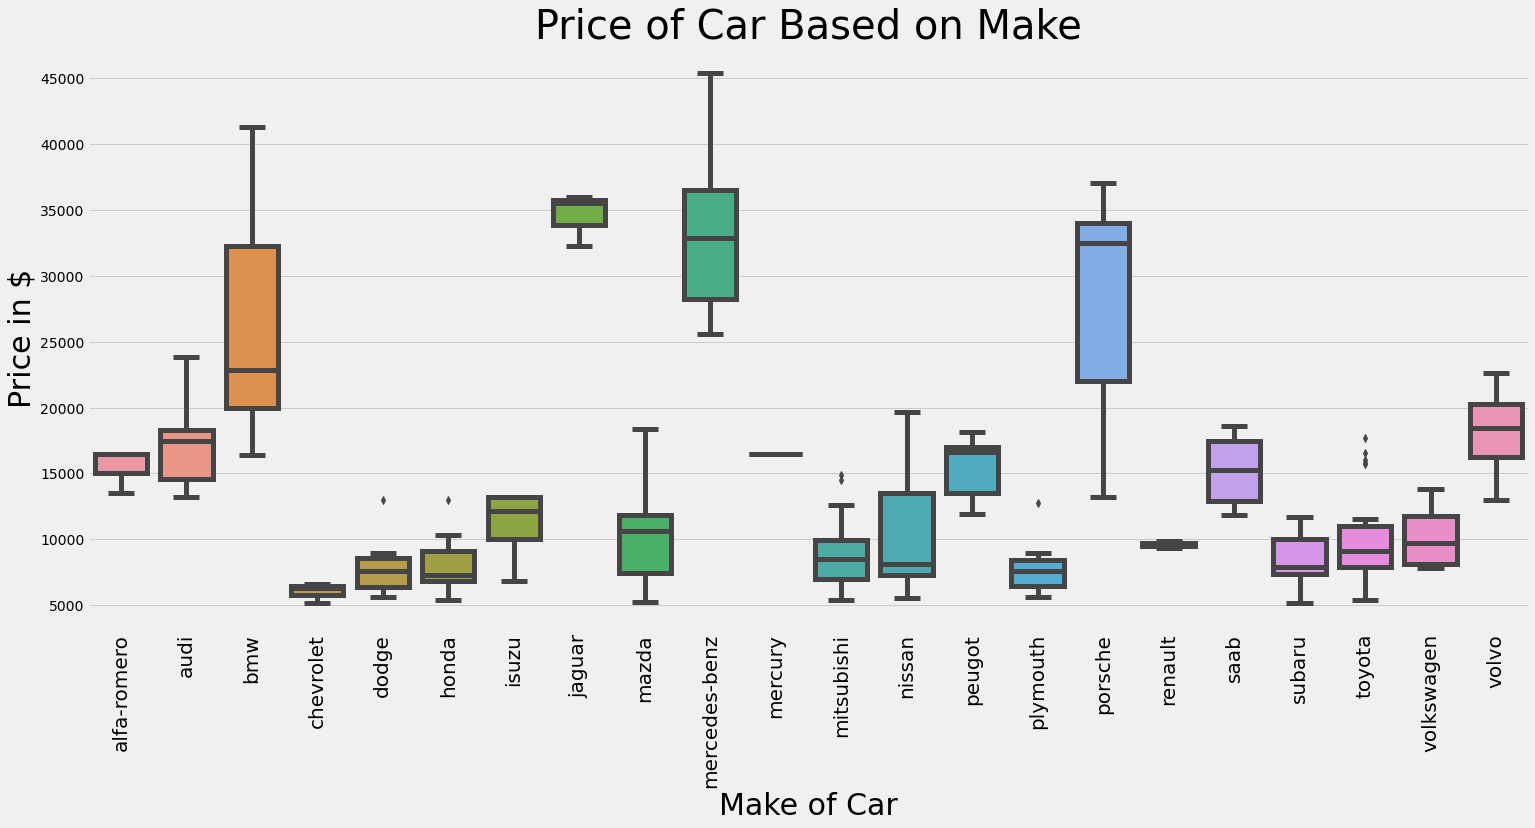

In [25]:

plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=car,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

We can see that Mercedes Benz , BMW and Prosche sell the expensive cars in America.

From the heat map we can make out that Width,Curb weight,Engine weight,Horse power,Highway-mpg have very high correlation to the price of the car.

### Price Based on type of Vehicle 

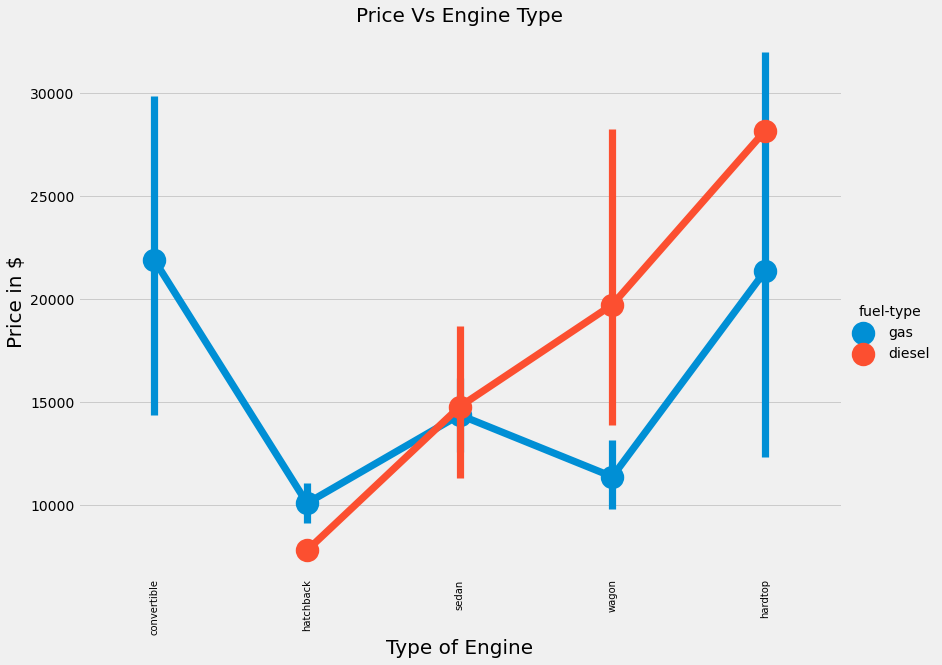

In [26]:
sns.factorplot(data=car, y="price", x="body-style" , hue="fuel-type" ,kind="point",height=8.27, aspect=11.7/8.27)
plt.xlabel('Type of Engine',fontsize=20)
plt.ylabel('Price in $',fontsize=20)
plt.title('Price Vs Engine Type',fontsize=20)
plt.tick_params(axis='x',labelsize=10,rotation=90)

So we have got the price of the vehicles based on the type.Hardtop and convertible vehicles are more expensive in the dataset.

### Car Price Based on Drive 

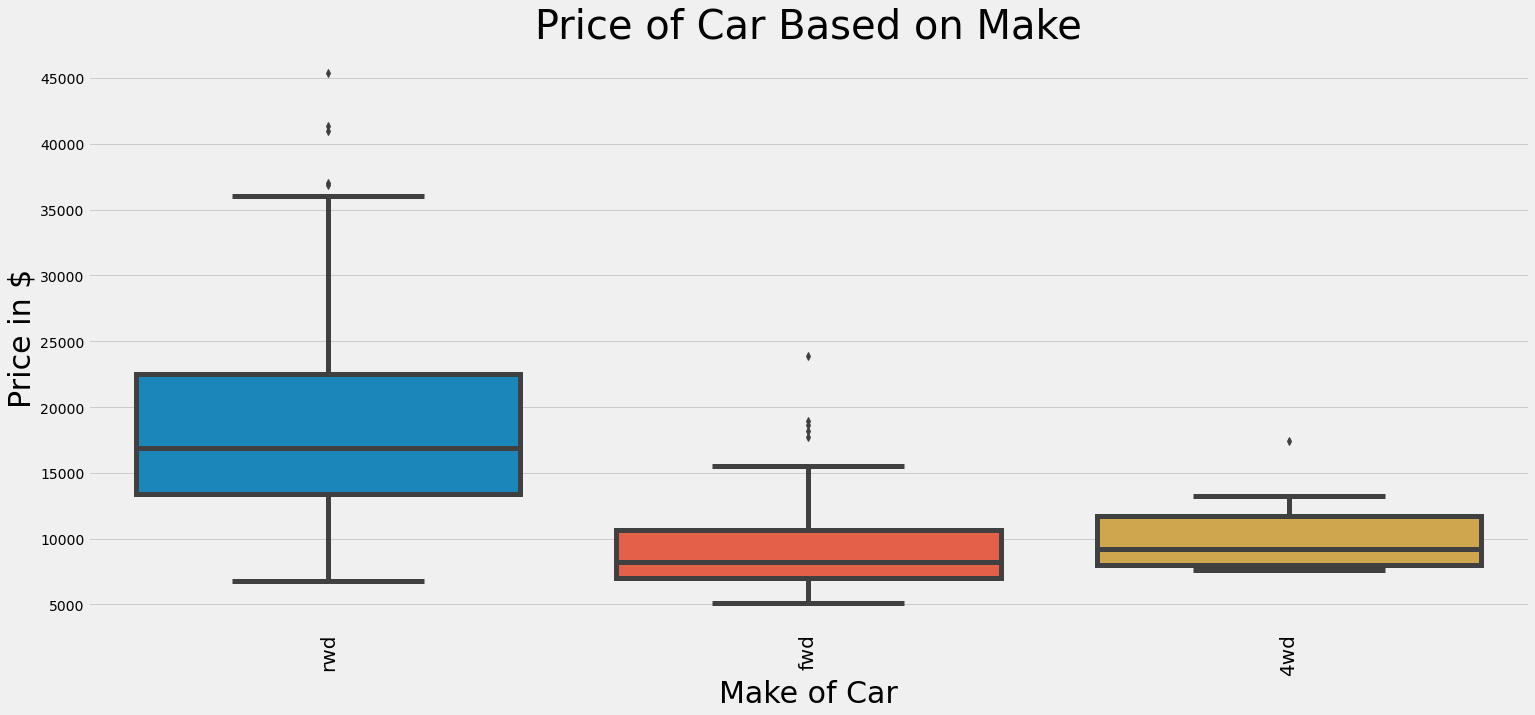

In [27]:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.boxplot(x='drive-wheels',y='price',data=car,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

Rear wheel drive are more expensive with a median price of $17000.Generally four wheel drive are more expensive.This is bit surprising.

### Heat Map

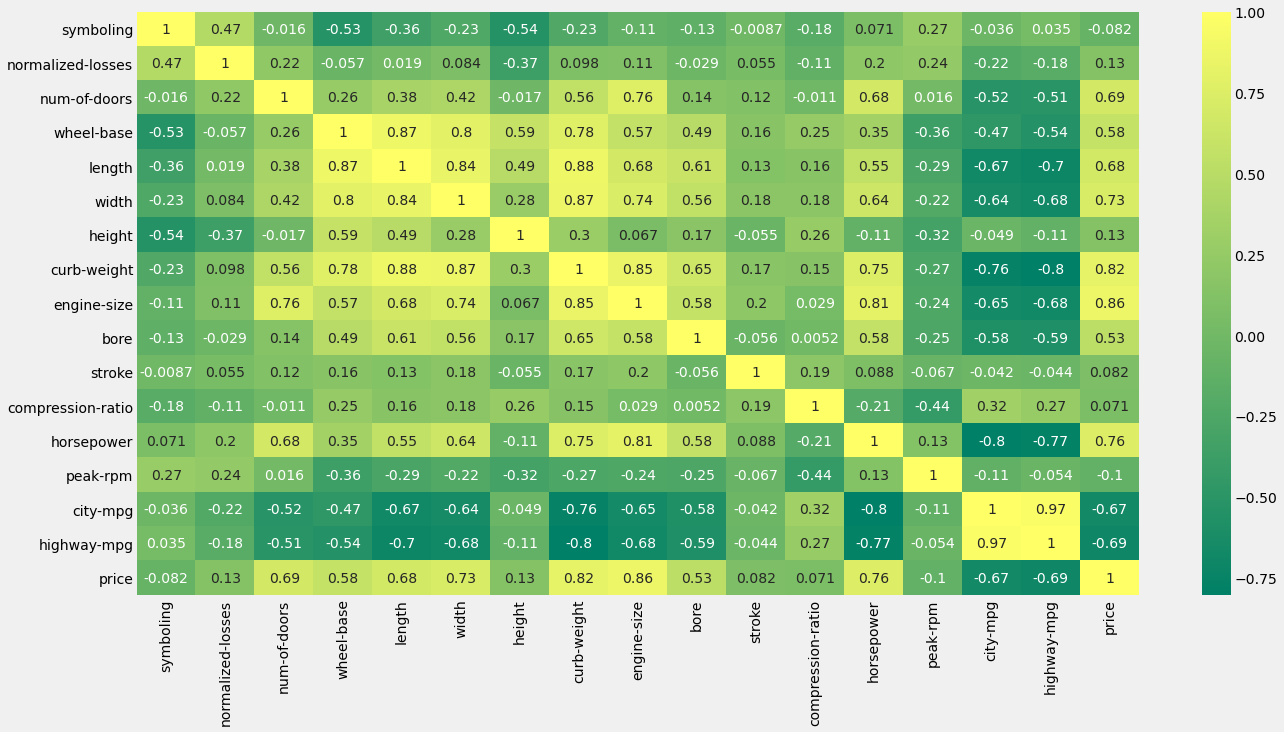

In [28]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(car.corr(),annot=True,cmap='summer');

From the heat map we can see that the features Width,Curb Weight,Engine Size and Horsepower have the highest correlation with the Price.We can see these four features for our Predicting the price of the car.

### Pair Plot

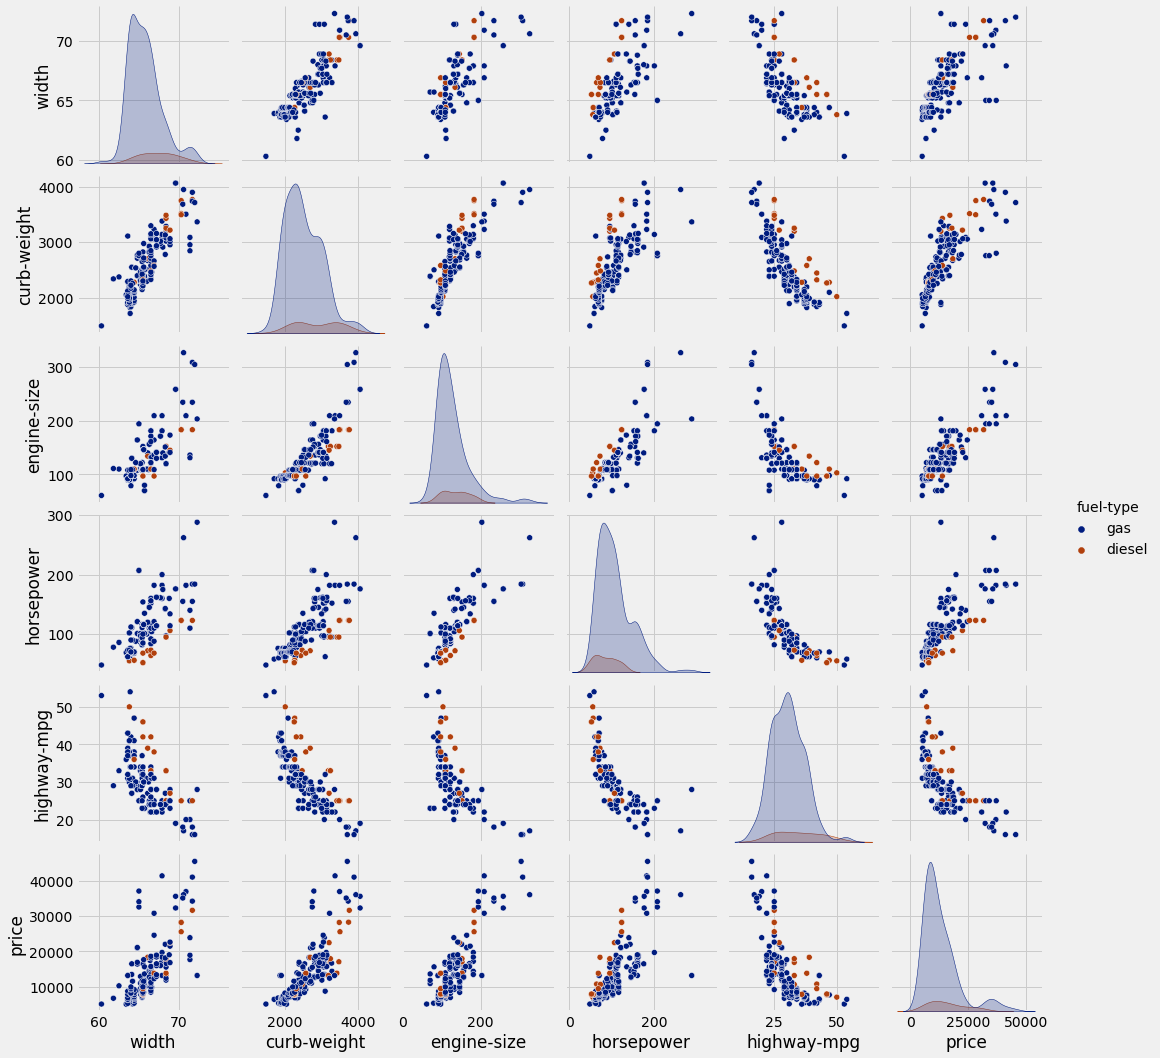

In [29]:
ax = sns.pairplot(car[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price",]], hue="fuel-type",palette='dark') #diag_kind="hist"

1.Vehicle with high price have low mileage.This because high priced vehicles go into luxary segment which are meant for high performance and running cost is not very important in this segment.

2.As the engine power(horse power) increases the price of the vehicle increases.More horse power also means bigger engine size

3.As the engine size increases the price of the vehicle increases.Weight of the engine increases with the increase in engine size.

4.High curb weight increases price of the vehicle and decreases the mileage of the vehicle.

5.Width has very good positive correlation to the price of the vehicle.

### Bubble Plot 

In [30]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [31]:
car1 = pd.DataFrame(car)

In [32]:
import plotly.offline as pyo 
import plotly.graph_objs as go 
import pandas as pd 
from plotly.offline import iplot

data = [go.Scatter(x=car1['horsepower'],
                  y=car1['city-mpg'],
                  text=car1['make'],
                  mode='markers',
                  marker=dict(size=0.1*car1['engine-size']))]

layout =go.Layout(title='Bubble Chart Mileage Vs Power-Bubble = Engine Size',
                 xaxis=dict(title='Horse Power'),
                 yaxis=dict(title='City Milage'),
                 hovermode='closest')
fig=go.Figure(data=data,layout=layout)
pyo.iplot(fig)

The cars with higher engine size have higher horse power but lower mileage.

# 4.Building Machine Learning Model

### Predicting the price of Cars

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for spliting the data into training and test set
from sklearn import metrics # for validating the accuracy of the model

### Matrix of Features

In [34]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [35]:

X=car.iloc[:,[11,13,16,21]].values
y=car.iloc[:,-1].values
#X

We have considered Width,Curb Weight,Engine Size and Horsepower for car Price prediction.

### Feature Scaling 

In [36]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

### Test Train Split

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

print('Training Set:',len(X_train))
print('Test Set:',len(X_test))
print('Training labels:',len(y_train))
print('Test labels:',len(y_test))


Training Set: 184
Test Set: 21
Training labels: 184
Test labels: 21


## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
#prediction1 = lr.predict(X_test)
#prediction1

#print('Accuracy for Linear Regression is ',metrics.accuracy_score(prediction1,y_test))


LinearRegression()

# 5.Model Evaluation

### Mean Square Error,R Squared and Mean Absolute Error 

In [39]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
'''Get Predictions & Print Metrics'''
predicts = lr.predict(X_test)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts),
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 6215.106661342069
        R2 Score: 0.0934079004201881
        Mean Absolute Error: 3707.1991573497617
     


### Root Mean Square Error

In [40]:
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test,predicts))
print('RMSE of the model:',rmse)

RMSE of the model: 6215.106661342069


RMSE Is high which may be because we have a very small dataset.

### R Squared Error

In [41]:
r2_train = lr.score(X_train,y_train)
r2_test = lr.score(X_test,y_test)
print('R Squared Error for Train set:',r2_train)
print('R Squared Error for Test set:',r2_test)


R Squared Error for Train set: 0.8130467417832228
R Squared Error for Test set: 0.0934079004201881


From the adjusted R square vale for the test set we can say that our model is overfitting on train set.

### Actual Vs Predicted Price

In [42]:
error = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error.head(5)
'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error.index, y=error['Predicted Values']),
    go.Bar(name='Actual', x=error.index, y=error['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()


From the above plot  we can see that in most cases the difference in actual and predicted prices is quite low.There are some exemptions that s driving the overall accuracy of the model down.

# 6.Conclusion:

1.In ths Dataset we have data of some car models in USA.We have imported and explored the dataset.Many columns have missing data which we have imputed using various missing value handling techniques.

2.After doing EDA we have got certain insights like -We have more Japanese Cars in the Dataset followed by European -We can see that 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars Most vehicle have standard Aspiration.The reason is this data set is very old.Now a days most vehicles have turbo system which improves efficiency and power output from an engine.We have many other observations which are mentioned above in the notebook

3.We have used Linear Regression to predict he price of cars.We can further fine tune the model to get better accuracy.

### To can refer to my other notebooks from https://www.kaggle.com/binuthomasphilip/code